In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C://Digital Nest/KNN")
print (os.getcwd())

C:\Digital Nest\KNN


In [2]:
churn = pd.read_csv('Churn.csv')
churn.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VMailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
# split the file into Independent and dependent variables
import copy
churnX = copy.copy(churn)
churnX.drop(columns=['Churn','Phone'],
            inplace=True)
print(churnX.shape)

(3333, 19)


In [4]:
# Create file with dependent 
churnY = pd.DataFrame(churn,columns=['Churn'])
print(churnY.shape)
print(churnY.head())

(3333, 1)
   Churn
0      0
1      0
2      0
3      0
4      0


In [5]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(churnX, churnY,
                                                    test_size = 0.20,
                                                    random_state = 0)

In [6]:
churn.columns.values

array(['AccountLength', 'VMailMessage', 'DayMins', 'EveMins', 'NightMins',
       'IntlMins', 'CustServCalls', 'Churn', 'IntlPlan', 'VMailPlan',
       'DayCalls', 'DayCharge', 'EveCalls', 'EveCharge', 'NightCalls',
       'NightCharge', 'IntlCalls', 'IntlCharge', 'State', 'AreaCode',
       'Phone'], dtype=object)

In [7]:
# extract only continuous columns
ContColumns = list(['AccountLength','VMailMessage','DayMins','EveMins',
                    'NightMins','IntlMins','CustServCalls','DayCalls',
                    'DayCharge','EveCalls','EveCharge','NightCalls',
                    'NightCharge', 'IntlCalls', 'IntlCharge'])
X_train_cont = pd.DataFrame(X_train,columns=ContColumns)
print(X_train_cont.shape)
X_test_cont = pd.DataFrame(X_test,columns=ContColumns)
print(X_test_cont.shape)

(2666, 15)
(667, 15)


In [8]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_train_cont2 = SS.fit_transform(X_train_cont)
print(X_train_cont2.shape)
X_test_cont2 = SS.transform(X_test_cont)
print(X_test_cont2.shape)

(2666, 15)
(667, 15)


In [9]:
# extract only categorical columns
CatColumns = list(['IntlPlan','VMailPlan','State','AreaCode'])
X_train_cat = pd.DataFrame(X_train,columns=CatColumns)
print(X_train_cat.shape)
X_test_cat = pd.DataFrame(X_test,columns=CatColumns)
print(X_test_cat.shape)

(2666, 4)
(667, 4)


In [10]:
# lable encoding for strings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train_cat.State = le.fit_transform(X_train_cat.State)
X_test_cat.State = le.transform(X_test_cat.State)
print(len(np.unique(X_train_cat.State)))

51


In [11]:
# apply one hot encoding on state and area
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse = False, handle_unknown = 'error')
X_train_cat2 = OHE.fit_transform(X_train_cat)
print(X_train_cat2.shape)
X_test_cat2 = OHE.transform(X_test_cat)
print(X_test_cat2.shape)

(2666, 58)
(667, 58)


In [12]:
# merge scaled continuous and onehotencoded categorical data
X_train_final = np.hstack((X_train_cont2,X_train_cat2))
print(X_train_final.shape)
X_test_final = np.hstack((X_test_cont2,X_test_cat2))
print(X_test_final.shape)

(2666, 73)
(667, 73)


In [13]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(algorithm = 'auto')
parms = {'n_neighbors': [3,5,7,9],
          'weights' : ['uniform']} 
# perform grid search with cross validation
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = KNN,param_grid = parms, 
                  scoring = 'f1_macro',
                  cv=3,refit=True,return_train_score = True,verbose=10,
                  n_jobs=-1)
CV.fit(X_train_final,Y_train.Churn)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done   7 out of  12 | elapsed:    5.5s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:    6.8s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    6.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=10)

In [14]:
# check the CV results
CVResults = pd.DataFrame(CV.cv_results_)
CVResults.to_excel('CVResutls_KNN.xlsx')

In [15]:
CV.best_score_

0.6893827579955495

In [16]:
# apply it on test
PredictProb = CV.predict_proba(X_test_final)
print(PredictProb[0:5])
PProb = pd.DataFrame(PredictProb,columns=["class0","class1"])
predictTest = CV.predict(X_test_final)
print(predictTest[0:10])

[[0.66666667 0.33333333]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]]
[0 0 0 0 1 0 0 0 0 0]


In [17]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[559  20]
 [ 64  24]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       579
           1       0.55      0.27      0.36        88

    accuracy                           0.87       667
   macro avg       0.72      0.62      0.65       667
weighted avg       0.85      0.87      0.86       667



In [18]:
# generate ROC curve
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, PProb.class1)
print(AUC)

0.7706370701837023


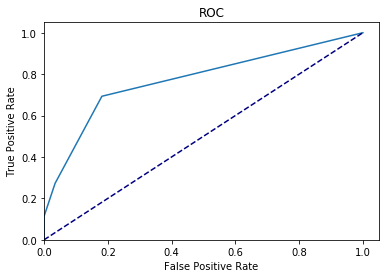

In [19]:
FPR, TPR, THR = roc_curve(Y_test, PProb.class1)
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()